<a href="https://colab.research.google.com/github/ramonferrari/trab_cadu/blob/main/Kadu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **COVIDiSTRESS Global Survey dataset**
 Trabalho final da disciplina Tratamento, Análise e Aprendizado Estatístico de Dados

# Importação de dados e preparação


In [ ]:
suppressMessages(suppressWarnings(install.packages("ggplot2")))         # pacote para gráficos
suppressMessages(suppressWarnings(install.packages("corrplot")))        # pacote para correlacao de variaveis
suppressMessages(suppressWarnings(install.packages("caret")))           # Classification And REgression Training
suppressMessages(suppressWarnings(install.packages("dplyr")))           # cacetada de coisas 1
suppressMessages(suppressWarnings(install.packages("tidyverse")))       # cacetada de coisas 2
suppressMessages(suppressWarnings(install.packages("scales")))          # agrupamento de valores em escalas
suppressMessages(suppressWarnings(install.packages("gridExtra")))       # pacote para gráficos
#install.packages("ggthemes")

suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(corrplot)))
suppressMessages(suppressWarnings(library(caret)))
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(scales)))
suppressMessages(suppressWarnings(library(tibble)))
suppressMessages(suppressWarnings(library(gridExtra)))
#suppressMessages(suppressWarnings(library(ggthemes)))

message("All set!")

All set!



In [ ]:
# quebra dos dados porque o GitHub não permite arquivos tão grandes
df1 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-1.csv",header=TRUE,sep=",");
df2 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-2.csv",header=TRUE,sep=",");
df3 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-3.csv",header=TRUE,sep=",");
df4 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-4.csv",header=TRUE,sep=",");
df5 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-5.csv",header=TRUE,sep=",");
df6 <- read.csv2("https://raw.githubusercontent.com/ramonferrari/trab_cadu/main/COVIDiSTRESS_May_30_cleaned_final-6.csv",header=TRUE,sep=",");

# concatena os dados (um embaixo do outro!)
df_backup <- rbind(df1,df2,df3,df4,df5,df6) 
# conhecendo meus dados
cat("As dimensões do data.frame são:",dim(df_backup)[1]," x ",dim(df_backup)[2])
cat("\n")
cat("As variáveis do data.frame são:\n")

# Função glimpse para data.frames
custom_glimpse <- function(df) {
  data.frame(
    col_name = colnames(df),
    col_index = 1:ncol(df),
    col_class = sapply(df, class),
    row.names = NULL
  )
}

glimpse <- custom_glimpse(df_backup)

# loop para impressão
for (val in 1:dim(glimpse)[1])
{
    # statement 
    cat("Coluna:",val,"Nome:",glimpse[val,1],"\n")
} 

As dimensões do data.frame são: 125306  x  154
As variáveis do data.frame são:
Coluna: 1 Nome: ID 
Coluna: 2 Nome: answered_all 
Coluna: 3 Nome: Duration..in.seconds. 
Coluna: 4 Nome: RecordedDate 
Coluna: 5 Nome: UserLanguage 
Coluna: 6 Nome: Dem_age 
Coluna: 7 Nome: Dem_gender 
Coluna: 8 Nome: Dem_edu 
Coluna: 9 Nome: Dem_edu_mom 
Coluna: 10 Nome: Dem_employment 
Coluna: 11 Nome: Country 
Coluna: 12 Nome: Dem_Expat 
Coluna: 13 Nome: Dem_state 
Coluna: 14 Nome: Dem_maritalstatus 
Coluna: 15 Nome: Dem_dependents 
Coluna: 16 Nome: Dem_riskgroup 
Coluna: 17 Nome: Dem_isolation 
Coluna: 18 Nome: Dem_isolation_adults 
Coluna: 19 Nome: Dem_isolation_kids 
Coluna: 20 Nome: AD_gain 
Coluna: 21 Nome: AD_loss 
Coluna: 22 Nome: AD_check 
Coluna: 23 Nome: Scale_PSS10_UCLA_1 
Coluna: 24 Nome: Scale_PSS10_UCLA_2 
Coluna: 25 Nome: Scale_PSS10_UCLA_3 
Coluna: 26 Nome: Scale_PSS10_UCLA_4 
Coluna: 27 Nome: Scale_PSS10_UCLA_5 
Coluna: 28 Nome: Scale_PSS10_UCLA_6 
Coluna: 29 Nome: Scale_PSS10_UCLA_7 
Col

In [76]:
# Cria df com a parte aproveitável, e trata o que não for
df<-df_backup[,1:19]

# Uniformiza os fatores
df$Dem_gender <- as.factor(df$Dem_gender)
message("\nLevels de gênero:")
levels(df$Dem_gender)

# Criação dos indices compostos
df$SPS = rowMeans(df_backup[,112:121],na.rm=TRUE)#####
df$Expl_media = rowMeans(df_backup[,139:144],na.rm=TRUE)
df$Expl_coping = rowMeans(df_backup[,122:137],na.rm=TRUE)#####
df$Expl_Distress = rowMeans(df_backup[,87:110],na.rm=TRUE)#####
df$BFF = rowMeans(df_backup[,72:86],na.rm=TRUE)#####
df$Compliance = rowMeans(df_backup[,50:55],na.rm=TRUE)#####
df$Corona_concerns = rowMeans(df_backup[,44:48],na.rm=TRUE)#####
df$PSS = rowMeans(df_backup[,23:32],na.rm=TRUE)#####
df$OECD_people = rowMeans(df_backup[,36:37],na.rm=TRUE)#####
df$OECD_inst = rowMeans(df_backup[,38:43],na.rm=TRUE)#####
df$Lon = rowMeans(df_backup[,33:35],na.rm=TRUE)#####

# Adequa levels do nivel escolar
message("\nLevels escolaridade antigos:")
levels(as.factor(df$Dem_edu)) # checa levels atuais
df$Education <- factor(df$Dem_edu) # cria variável com levels para brincarmos
levels(df$Education) <- list("Nenhum a Fundamental"=c("None", "Uninformative response","Up to 6 years of school","Up to 9 years of school"), "Médio a graduação incompleta"=c("Some College, short continuing education or equivalent", "Up to 12 years of school"), "Graduação a Doutorado"=c("College degree, bachelor, master", "PhD/Doctorate"))
message("\nLevels escolaridade novos:")
levels(df$Education)

# Adequa levels da ocupação
message("\nLevels ocupação antigos:")
levels(as.factor(df$Dem_employment))
df$Emplo <- factor(df$Dem_employment)
levels(df$Emplo) <- list("Estudantes/Aposentados"=c("Student", "Retired"), "Sem emprego"=c("Not employed"), "Algum emprego/Empregados"=c("Full time employed", "Part time employed","Self-employed"))
message("\nLevels ocupação novos:")
levels(df$Emplo)

message("\nAll set!")


Levels de gênero:



[1] "Female"                     "Male"                      
[3] "Other/would rather not say"


Levels escolaridade antigos:



[1] "College degree, bachelor, master"                      
[2] "None"                                                  
[3] "PhD/Doctorate"                                         
[4] "Some College, short continuing education or equivalent"
[5] "Uninformative response"                                
[6] "Up to 12 years of school"                              
[7] "Up to 6 years of school"                               
[8] "Up to 9 years of school"


Levels escolaridade novos:



[1] "Nenhum a Fundamental"         "Médio a graduação incompleta"
[3] "Graduação a Doutorado"


Levels ocupação antigos:



[1] "Full time employed" "Not employed"       "Part time employed"
[4] "Retired"            "Self-employed"      "Student"


Levels ocupação novos:



[1] "Estudantes/Aposentados"   "Sem emprego"             
[3] "Algum emprego/Empregados"


All set!



# Mapa de variáveis

In [ ]:
# Para criação dos mapas no BI
write.csv(df,"data_frame_for_map.csv", row.names = TRUE)

# Modelagem Numérica 

In [ ]:
df_num <- df       ##### só numéricos
df_num[,1:2] <- NULL
df_num[,2:3] <- NULL
df_num[,3:10] <- NULL
df_num[,4:5] <- NULL

colnames(df_num)
head(df_num)

[1] "Duration..in.seconds." "Dem_age"               "Dem_dependents"       
 [4] "Dem_isolation_adults"  "Dem_isolation_kids"    "SPS"                  
 [7] "Expl_media"            "Expl_coping"           "Expl_Distress"        
[10] "BFF"                   "Compliance"            "Corona_concerns"      
[13] "PSS"                   "OECD_people"           "OECD_inst"            
[16] "Lon"

,Duration..in.seconds.,Dem_age,Dem_dependents,Dem_isolation_adults,Dem_isolation_kids,SPS,Expl_media,Expl_coping,Expl_Distress,BFF,Compliance,Corona_concerns,PSS,OECD_people,OECD_inst,Lon
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,180,29,0,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,3.000000
2,3100,20,0,NA,NA,5.0,2.500000,3.937500,27.583333,4.066667,3.333333,3.20,2.8,6.5,4.000000,2.333333
3,127,47,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1710,79,0,1,0,3.9,3.833333,2.666667,30.523810,4.142857,3.500000,3.00,3.4,6.0,2.600000,4.000000
5,2239,61,0,1,0,5.0,4.333333,5.066667,8.913043,4.266667,5.200000,4.25,3.0,8.0,7.666667,1.000000
6,1221,68,0,1,0,5.0,5.000000,4.187500,11.750000,3.933333,4.000000,5.00,2.9,7.0,7.500000,2.333333


In [ ]:
a<-nrow(df_num)
df_num <- na.omit(df_num)
b<-nrow(df_num)

a;b;round(100*b/a,2)

[1] 125306

[1] 74271

[1] 59.27

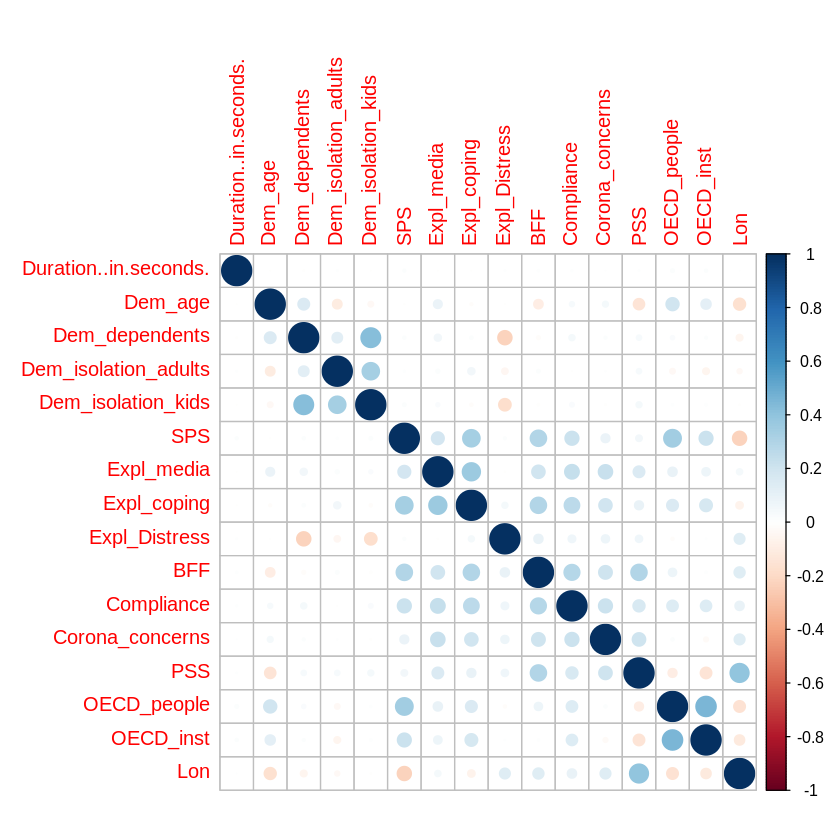

In [ ]:
corrplot(cor(df_num))

In [ ]:
set.seed(314)
trainIndex <- createDataPartition(df_num$PSS, p = .7, list = FALSE)

dfTrain <- df_num[ trainIndex,]
dfTest  <- df_num[-trainIndex,]

model1 <- train(PSS~.,data = dfTrain,method = "lm")
model1

# Análise dos Dados


In [77]:
# Criação de colunas de estatísticas descritivas por PAÍS

# Organiza por país, e faz uma estatística pela variável Dem_age
df1_names <- aggregate(x=df$Dem_age,by=list(df$Country),FUN=length)[,1]   # nomes dos países
df1_sum <- aggregate(x=df$Dem_age,by=list(df$Country),FUN=length)[,2]     # soma de resposta por países
df1_mean  <- aggregate(x=df$Dem_age,by=list(df$Country),FUN=mean)[,2]     # média por país
df1_sd  <- aggregate(x=df$Dem_age,by=list(df$Country),FUN=sd)[,2]         # desvio-padrão por país

df1_sex <- aggregate(x=df$Dem_gender,by=list(df$Country,df$Dem_gender),FUN=length,drop=FALSE) # totais de casos de sex sem NAs
df1_fem <- filter(df1_sex,df1_sex[,2]=="Female")[3]
df1_mas <- filter(df1_sex,df1_sex[,2]=="Male")[3]
df1_out <- filter(df1_sex,df1_sex[,2]=="Other/would rather not say")[3]

df1_fem<-round(df1_fem/df1_sum,3) # Arredonda, com 3 casas decimais
df1_mas<-round(df1_mas/df1_sum,3)
df1_out<-1-df1_mas-df1_fem

# cria um data frame auxiliar com essas variáveis criadas
df1 <- data.frame(df1_names,df1_sum,df1_fem,df1_mas,df1_out,df1_mean,df1_sd)
variaveis <- c("Country","N","Sex Feminine","Sex Masculine","Other","Mean_age","Sd_age") #nomeio as variáveis como eu quero
names(df1) <- variaveis

# organiza data.frame por número decrescente de N (respostas)
df1 <- df1[order(df1$N),]
df1 <- df1[order(-df1$N),]

# Restringe o dataset aos dados de países com mais de 200 respostas.
df<-merge(df,df1)
df<-filter(df,df$N>200)

# Visão das estatísticas descritivas para os países com maior N
dim(df1)
head(df1) 
#tail(df1)

[1] 177   7

,Country,N,Sex Feminine,Sex Masculine,Other,Mean_age,Sd_age
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
55,Finland,22933,0.813,0.167,0.020,43.35721,14.16987
56,France,13475,0.510,0.472,0.018,33.26738,12.76009
43,Denmark,10891,0.783,0.211,0.006,42.54302,14.27699
105,Mexico,9169,0.720,0.270,0.010,37.45338,13.83011
95,Lithuania,8255,0.751,0.242,0.007,38.55300,12.45947
7,Argentina,5923,0.837,0.151,0.012,41.59277,15.24368


In [78]:
# Visão das estatísticas descritivas para os países com menor N
dim(df1)
#head(df1) 
tail(df1)

[1] 177   7

,Country,N,Sex Feminine,Sex Masculine,Other,Mean_age,Sd_age
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
148,Somalia,1,NA,1,NA,26,NA
152,Sudan,1,1,NA,NA,33,NA
153,"Sudan, South",1,NA,1,NA,49,NA
158,Tajikistan,1,1,NA,NA,33,NA
162,The Gambia,1,1,NA,NA,58,NA
166,Turkmenistan,1,NA,1,NA,58,NA


In [ ]:
# Exportação de dados para criação de mapas
write.csv(df1,"data_frame_for_map_withN.csv", row.names = TRUE)
message("All set!")

All set!



## Idade

In [79]:
# Descobre paises com menores e maiores idades
head(df1[order(df1$Mean_age),],5) # reorganiza dataset df1 por ordem de idade
tail(df1[order(df1$Mean_age),],5)

# Cria um dataset apenas com alguns países
df_subset1<-df[df$Country == "Brazil" | df$Country == "Pakistan" | df$Country == "Bangladesh" | df$Country == "United States" | df$Country == "Sweden" | df$Country == "Hungary",]

# Reorganiza dataset limitado por ordem de idade
df_subset1 <- df_subset1[order(df_subset1$Mean),]

dim(df)
dim(df_subset1)
message("All set!")

,Country,N,Sex Feminine,Sex Masculine,Other,Mean_age,Sd_age
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
111,Mozambique,1,1.0,NA,NA,18,NA
119,Niger,1,1.0,NA,NA,18,NA
177,Zimbabwe,4,1.0,NA,NA,20,2.160247
26,Burundi,2,0.5,0.5,0,22,4.242641
47,East Timor (Timor-Leste),1,1.0,NA,NA,22,NA


,Country,N,Sex Feminine,Sex Masculine,Other,Mean_age,Sd_age
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53,Ethiopia,2,0.5,0.5,0.0,58.5,14.84924
51,Eritrea,1,1.0,NA,NA,61.0,NA
6,Antigua and Barbuda,5,0.4,0.2,0.4,67.6,39.99125
103,Mauritania,1,NA,1.0,NA,82.0,NA
19,Bhutan,1,1.0,NA,NA,90.0,NA


[1] 122065     38

[1] 8319   38

All set!



In [88]:
dim(df) # dataset original

df_subset2 <- df[df$N > 3054,] # Seleciona 4 países com maior quantidade de respostas, para visualização dos dados
dim(df_subset2)
# Adiciona United States e Brazil na lista
df_subset2 <- rbind(df_subset2,df[df$Country == "United States",],df[df$Country == "Brazil",])
df_subset2$Country[df_subset2$Country=="United States"]<-"US"
df_subset2 <- df_subset2[!is.na(df_subset2$Dem_gender), ] # remove NAs
df_subset2 <- df_subset2[!df_subset2$Dem_gender=="Other/would rather not say",] # deixa apenas masc/fem

dim(df_subset2)

[1] 122065     38

[1] 86646    38

[1] 88418    38

png 
  2

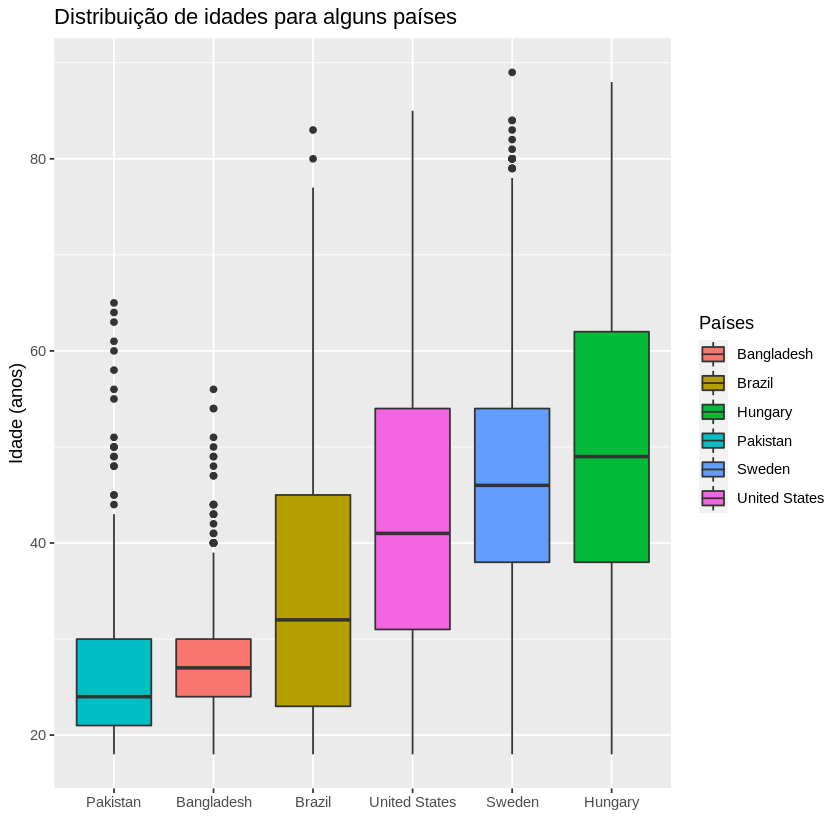

In [81]:
# Gráfico de boxplot da variável idade para alguns países
g1 <- ggplot(df_subset1, aes(x=reorder(Country,Mean_age), y=Dem_age, fill=Country)) +  geom_boxplot() +
    ggtitle("Distribuição de idades para alguns países") +  xlab("") + ylab("Idade (anos)") + labs(fill = "Países")

g1
pdf("Figura1_boxplot.pdf",title="Boxplot1")
g1
dev.off()

png 
  2

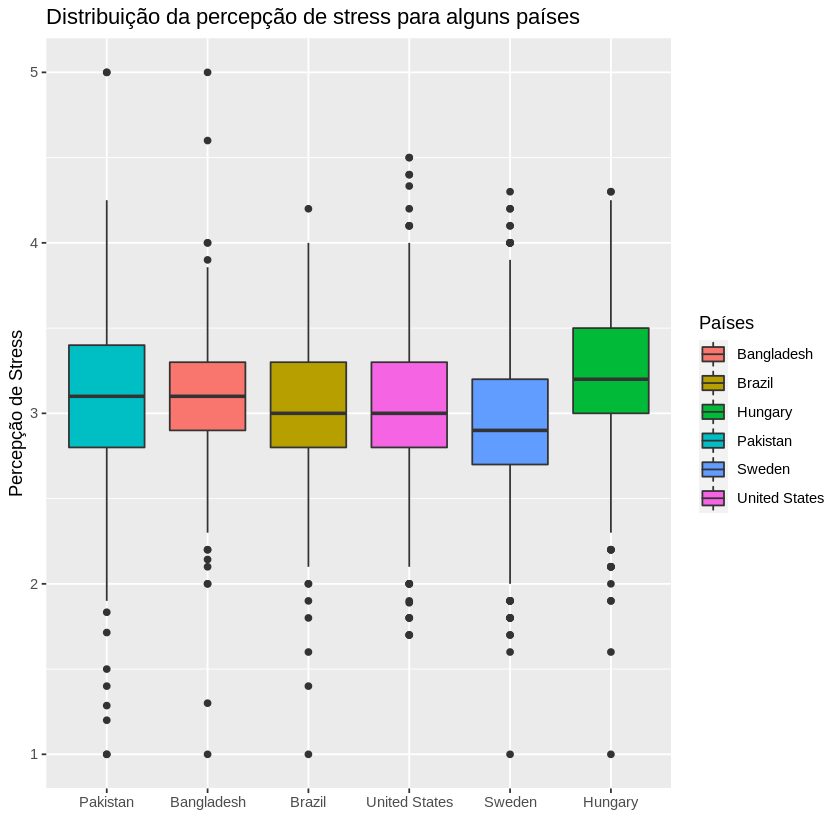

In [82]:
# Gráfico de boxplot da variável PSS para alguns países

g1 <- ggplot(df_subset1, aes(x=reorder(Country,Mean_age), y=PSS, fill=Country,na.rm=TRUE)) +  geom_boxplot() +
    ggtitle("Distribuição da percepção de stress para alguns países") +  xlab("") + ylab("Percepção de Stress") + labs(fill = "Países") 

suppressWarnings(print(g1))
pdf("Figura2_boxplot.pdf",title="Avaliação do critério de parada")
suppressWarnings(print(g1))
dev.off()

png 
  2

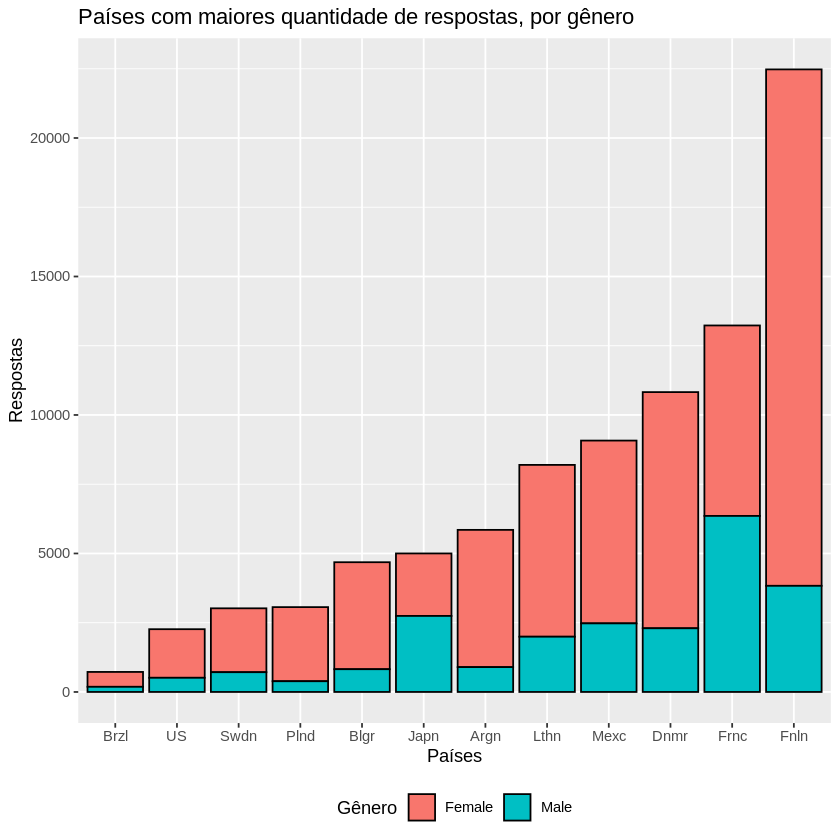

In [89]:
# Gráfico de barras de N por países, com segregação por gênero

g2 <- ggplot(data=df_subset2[!is.na(df_subset2$Dem_gender), ], aes(x=reorder(Country,N),fill=Dem_gender)) +
    geom_bar(stat="count",color="black") +
    ggtitle("Países com maiores quantidade de respostas, por gênero") +  xlab("Países") + ylab("Respostas") + labs(fill = "Gênero",legend.position="top")+
    scale_x_discrete(labels = abbreviate)

g2 + theme(legend.position="bottom")
pdf("N_Sex_Barplot.pdf",title="Países com maiores quantidade de respostas, por gênero")
g2 + theme(legend.position="bottom")
dev.off()

png 
  2

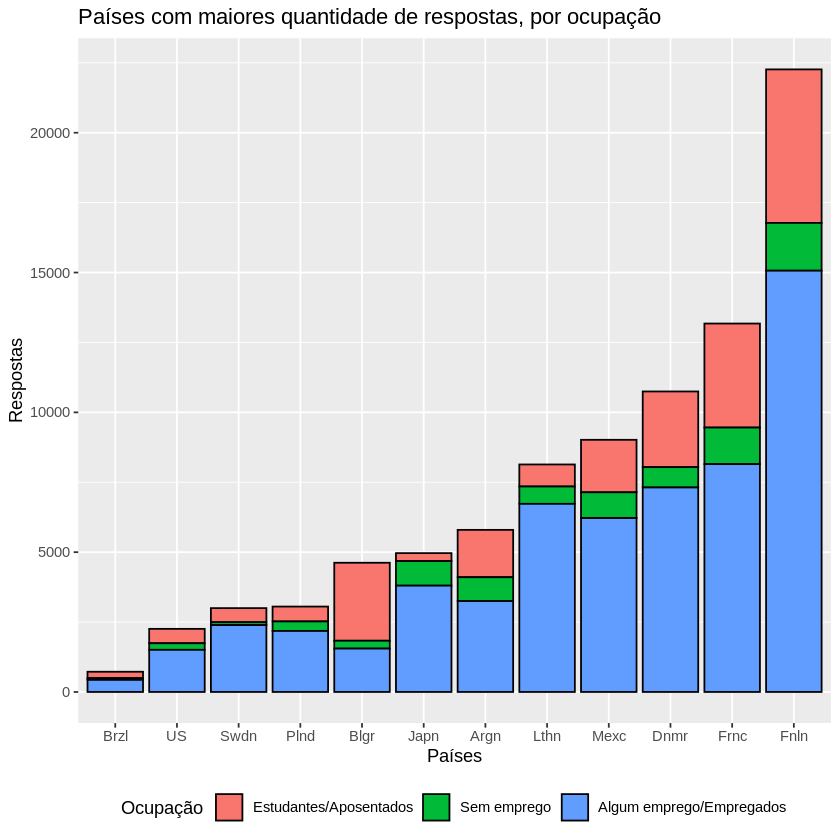

In [90]:
# Gráfico de barras de N por países, com segregação por ocupação

g6 <- ggplot(data=df_subset2[!is.na(df_subset2$Emplo), ], aes(x=reorder(Country,N),fill=Emplo)) +
    geom_bar(stat="count",color="black") +
    ggtitle("Países com maiores quantidade de respostas, por ocupação") +  xlab("Países") + ylab("Respostas") + labs(fill = "Ocupação",legend.position="top")+
    scale_x_discrete(labels = abbreviate)

g6 + theme(legend.position="bottom")
pdf("N_Ocupacao_Barplot.pdf",title="Países com maiores quantidade de respostas, por ocupação")
g6 + theme(legend.position="bottom")
dev.off()

png 
  2

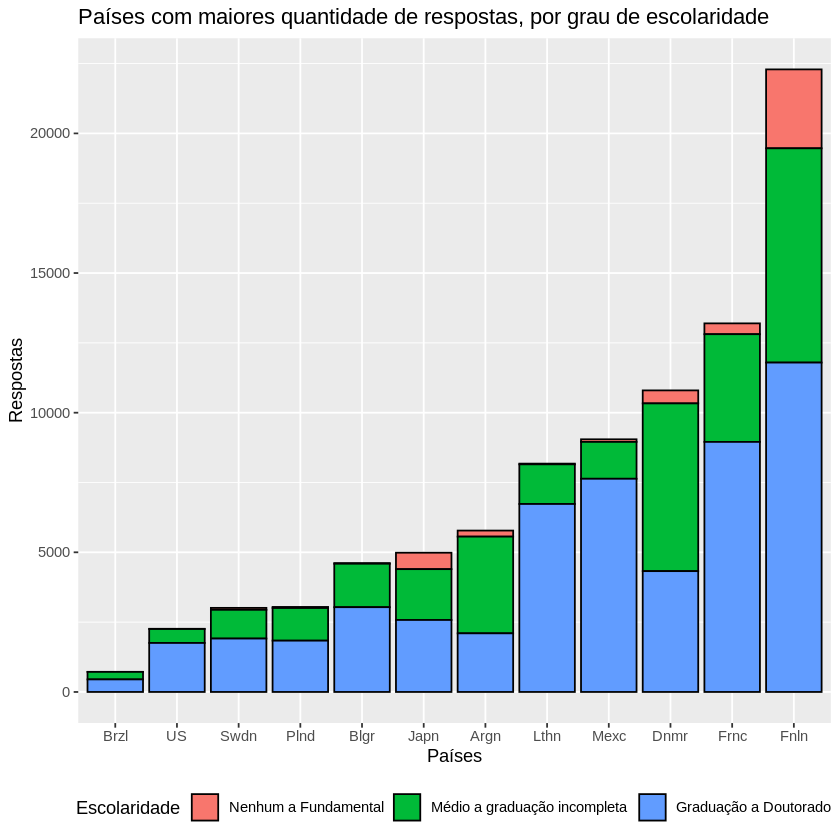

In [91]:
# Gráfico de barras de N por países, com segregação por escolaridade

g3 <- ggplot(data=df_subset2[!is.na(df_subset2$Education), ], aes(x=reorder(Country,N),fill=Education)) +
    geom_bar(stat="count",color="black") +
    ggtitle("Países com maiores quantidade de respostas, por grau de escolaridade") +  xlab("Países") + ylab("Respostas") + labs(fill = "Escolaridade",legend.position="top")+
    scale_x_discrete(labels = abbreviate)

g3 + theme(legend.position="bottom")
pdf("N_Education_Barplot.pdf",title="Países com maiores quantidade de respostas, por grau de escolaridade")
g3 + theme(legend.position="bottom")
dev.off()

null device 
          1

null device 
          1

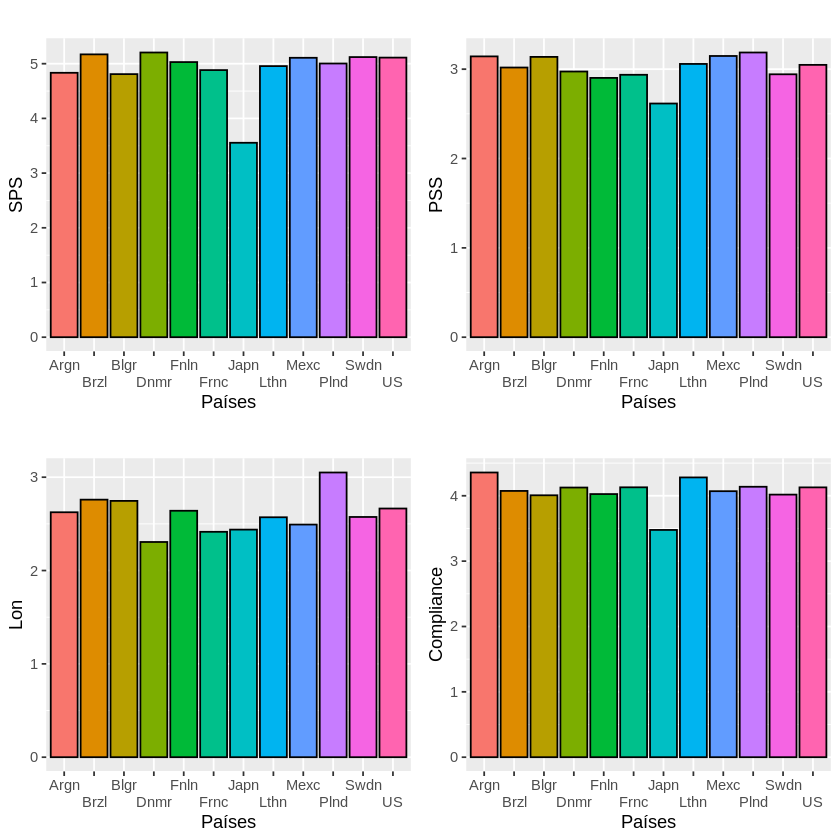

In [92]:
# Gráfico de barras de métricas perceptivas para alguns países

g41 <- ggplot(data=df_subset2, aes(x=Country,y=SPS,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("SPS") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g42 <- ggplot(data=df_subset2, aes(x=Country,y=PSS,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("PSS") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g43 <- ggplot(data=df_subset2, aes(x=Country,y=Lon,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("Lon") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g44 <- ggplot(data=df_subset2, aes(x=Country,y=Compliance,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("Compliance") + theme(legend.position="none") +
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

suppressWarnings(grid.arrange(g41,g42,g43,g44,ncol=2))
dev.off()
pdf("Metricas_paises_1.pdf",title="Métricas dos países com maiores quantidade de respostas")
suppressWarnings(grid.arrange(g41,g42,g43,g44,ncol=2))
dev.off()

null device 
          1

null device 
          1

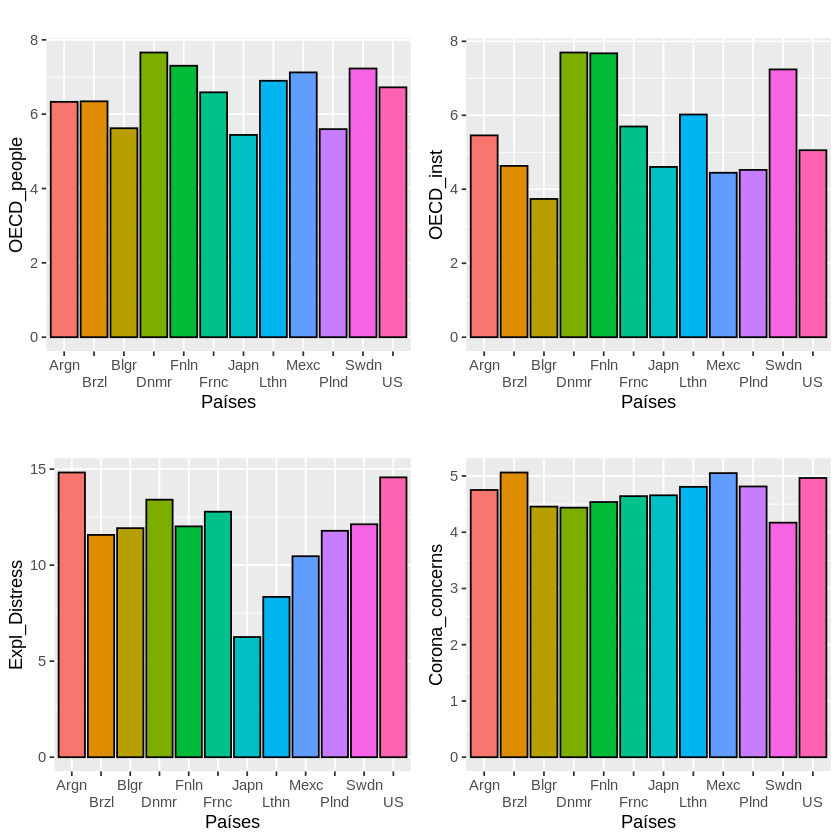

In [93]:
# Gráfico de barras de métricas perceptivas para alguns países

g51 <- ggplot(data=df_subset2, aes(x=Country,y=OECD_people,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("OECD_people") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g52 <- ggplot(data=df_subset2, aes(x=Country,y=OECD_inst,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("OECD_inst") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g53 <- ggplot(data=df_subset2, aes(x=Country,y=Expl_Distress,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("Expl_Distress") + theme(legend.position="none")+
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

g54 <- ggplot(data=df_subset2, aes(x=Country,y=Corona_concerns,fill=Country)) +
    geom_bar(stat = "summary", fun = "mean",color="black") +
    ggtitle("") +  xlab("Países") + ylab("Corona_concerns") + theme(legend.position="none") +
    scale_x_discrete(labels = abbreviate,guide = guide_axis(n.dodge=2)) 

suppressWarnings(grid.arrange(g51,g52,g53,g54,ncol=2))
dev.off()
pdf("Metricas_paises_2.pdf",title="Métricas dos países com maiores quantidade de respostas")
suppressWarnings(grid.arrange(g51,g52,g53,g54,ncol=2))
dev.off()

png 
  2

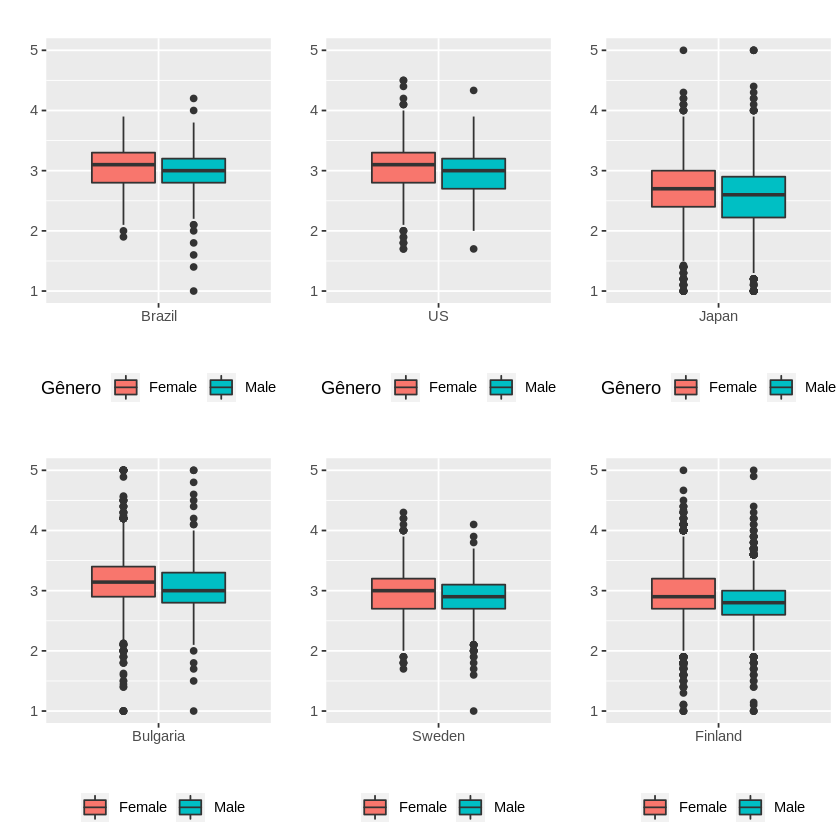

In [94]:
# Boxplot da variável PSS para alguns países, por gênero

new1 <- ggplot(df_subset2[df_subset2$Country=="Brazil",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = "Gênero")+ theme(legend.position="bottom")+ ylim(c(1, 5))

new2 <- ggplot(df_subset2[df_subset2$Country=="US",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = "Gênero")+ theme(legend.position="bottom")+ ylim(c(1, 5))

new3 <- ggplot(df_subset2[df_subset2$Country=="Japan",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = "Gênero")+ theme(legend.position="bottom")+ ylim(c(1, 5))

new4 <- ggplot(df_subset2[df_subset2$Country=="Bulgaria",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))

new5 <- ggplot(df_subset2[df_subset2$Country=="Sweden",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))

new6 <- ggplot(df_subset2[df_subset2$Country=="Finland",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Dem_gender)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))

suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
pdf("Boxplot_new1.pdf",title="xxxxx")
suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
dev.off()

png 
  2

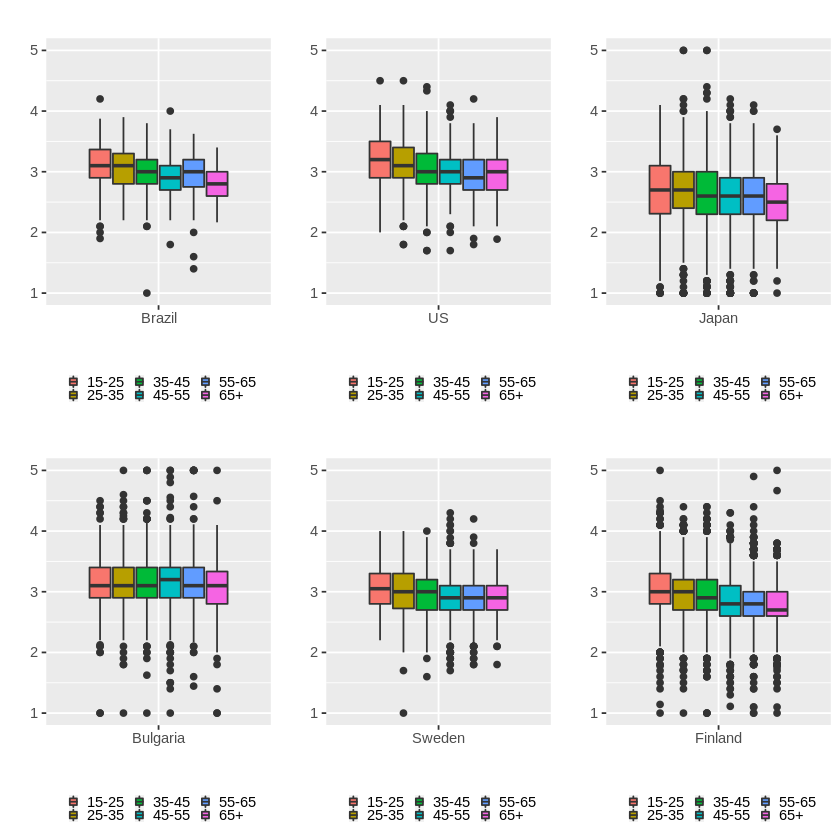

In [95]:
# Boxplot da variável PSS para alguns países, por faixa etária

# Cria ranges com faixas etárias
df_subset2$Range <- cut( as.numeric(df_subset2$Dem_age), breaks = c(15,25,35,45,55,65,110), labels = c("15-25","25-35","35-45","45-55","55-65","65+"))  # create Range column

new1 <- ggplot(df_subset2[df_subset2$Country=="Brazil",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new2 <- ggplot(df_subset2[df_subset2$Country=="US",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new3 <- ggplot(df_subset2[df_subset2$Country=="Japan",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new4 <- ggplot(df_subset2[df_subset2$Country=="Bulgaria",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new5 <- ggplot(df_subset2[df_subset2$Country=="Sweden",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

new6 <- ggplot(df_subset2[df_subset2$Country=="Finland",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Range)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5))+  theme(legend.key.size = unit(0.2, 'cm'))

suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
pdf("Boxplot_new2.pdf",title="xxxxx")
suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
dev.off()

[1] "Nenhum a Fundamental"         "Médio a graduação incompleta"
[3] "Graduação a Doutorado"

[1] "< Médio" "Médio"   "Grad+"

png 
  2

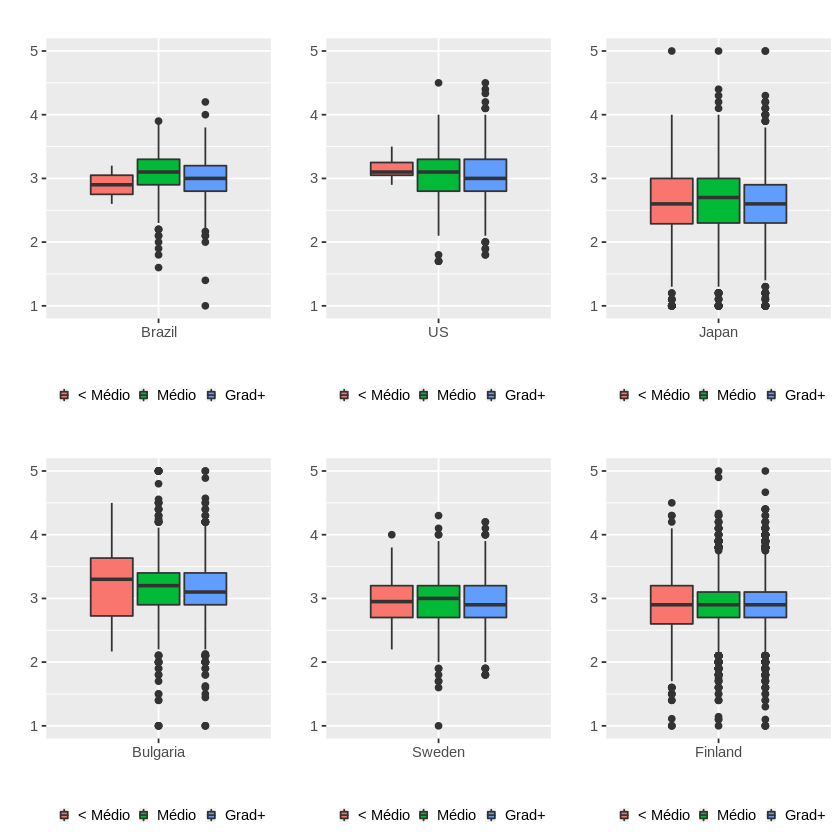

In [96]:
# Boxplot da variável PSS para alguns países, por escolaridade

# Criação de novos levels para educação - para abreviar
levels(df_subset2$Education)
levels(df_subset2$Education)[levels(df_subset2$Education)=="Nenhum a Fundamental"] <- "< Médio"
levels(df_subset2$Education)[levels(df_subset2$Education)=="Médio a graduação incompleta"] <- "Médio"
levels(df_subset2$Education)[levels(df_subset2$Education)=="Graduação a Doutorado"] <- "Grad+"
levels(df_subset2$Education)
df_subset2 <- df_subset2[!is.na(df_subset2$Education), ]

new1 <- ggplot(df_subset2[df_subset2$Country=="Brazil",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new2 <- ggplot(df_subset2[df_subset2$Country=="US",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new3 <- ggplot(df_subset2[df_subset2$Country=="Japan",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new4 <- ggplot(df_subset2[df_subset2$Country=="Bulgaria",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new5 <- ggplot(df_subset2[df_subset2$Country=="Sweden",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

new6 <- ggplot(df_subset2[df_subset2$Country=="Finland",], aes(x=reorder(Country,Mean_age), y=PSS, fill=Education)) +  geom_boxplot() +
    ggtitle("") +  xlab("") + ylab("") + labs(fill = NULL)+ theme(legend.position="bottom")+ ylim(c(1, 5)) +  theme(legend.key.size = unit(0.2, 'cm'))

suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
pdf("Boxplot_new3.pdf",title="xxxxx")
suppressWarnings(grid.arrange(new1,new2,new3,new4,new5,new6,ncol=3))
dev.off()